In [370]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
data_0=pd.read_csv('./datasets/streaminghistory0.csv')
data_1=pd.read_csv('./datasets/streaminghistory1.csv')
data_2=pd.read_csv('./datasets/streaminghistory2.csv')

In [151]:
df=pd.concat((data_0,data_1,data_2))

In [152]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2019-08-14 07:25,Call Her Daddy,11 - MILF Hunting Season,276948
1,2019-08-15 00:42,Call Her Daddy,11 - MILF Hunting Season,44074
2,2019-08-15 03:05,The Daily,Inside Hong Kong’s Airport,1011541
3,2019-08-15 03:08,JENNIE,SOLO,169566
4,2019-08-15 03:10,CHUNG HA,Gotta Go,109869


In [153]:
#convert artist and track name to all lower case

In [154]:
df['artistName']=df['artistName'].str.lower()

In [155]:
df['trackName']=df['trackName'].str.lower()

In [156]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2019-08-14 07:25,call her daddy,11 - milf hunting season,276948
1,2019-08-15 00:42,call her daddy,11 - milf hunting season,44074
2,2019-08-15 03:05,the daily,inside hong kong’s airport,1011541
3,2019-08-15 03:08,jennie,solo,169566
4,2019-08-15 03:10,chung ha,gotta go,109869


In [157]:
df.dtypes

endTime       object
artistName    object
trackName     object
msPlayed       int64
dtype: object

In [158]:
#convert endTime into data time formats and extract day month and year

In [159]:
df['endTime']=pd.to_datetime(df['endTime'],format='%Y-%m-%d %H:%M')

In [160]:
df.head()

,endTime,artistName,trackName,msPlayed
0,2019-08-14 07:25:00,call her daddy,11 - milf hunting season,276948
1,2019-08-15 00:42:00,call her daddy,11 - milf hunting season,44074
2,2019-08-15 03:05:00,the daily,inside hong kong’s airport,1011541
3,2019-08-15 03:08:00,jennie,solo,169566
4,2019-08-15 03:10:00,chung ha,gotta go,109869


In [161]:
#seperate my podcasts and music (if msplayed is greater than 15 mins (900000 ms) )

In [162]:
df_podcasts=df.loc[df['msPlayed']>900000]

In [163]:
df_podcasts=df_podcasts.groupby([ 'artistName'], as_index=False).sum().sort_values(by='msPlayed', ascending = False)

In [164]:
#top 10 podcasts
df_podcasts.head(10)

,artistName,msPlayed
8,geniusbrain,193281551
9,halfcast podcast,185646981
19,views with david dobrik and jason nash,135135404
18,the joe budden podcast with rory & mal,125941440
20,zane and heath: unfiltered,81660057
17,the daily,36449287
5,call her daddy,36430473
1,andrew schulz's flagrant 2 with akaash singh,29866057
12,no chaser with timothy delaghetto,26179249
16,the brilliant idiots,23455154


In [165]:
#change ms to hours and rename columns

In [166]:
df_podcasts.columns=['artistName','Total msPlayed']

In [167]:
df_podcasts['Total_Hours_Played']=df_podcasts['Total msPlayed']/3600000

In [168]:
df_podcasts.drop(['Total msPlayed'],axis=1,inplace=True)

In [169]:
#Visualise my top 10 podcasts by hours listened

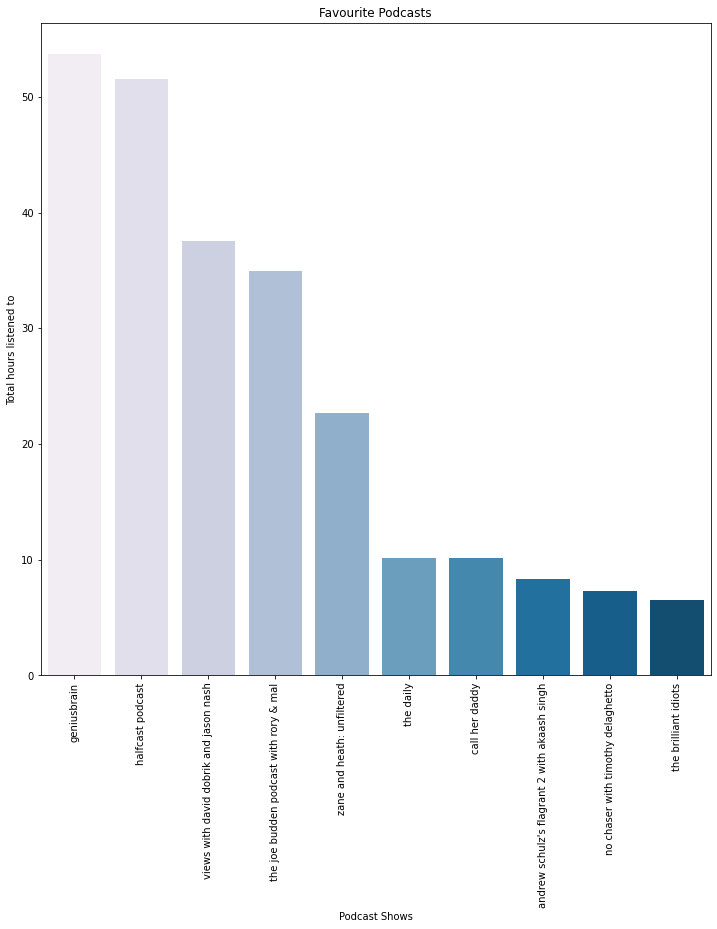

In [361]:
plt.figure(figsize=(12,12))
sns.barplot(x='artistName',y='Total_Hours_Played',data=df_podcasts.head(10),palette='PuBu')
plt.xticks( rotation=90)
plt.xlabel('Podcast Shows')
plt.ylabel('Total hours listened to')
plt.title('Favourite Podcasts')
plt.show()

In [171]:
#Distinguish music from podcasts, exclude granular(white/brown noise)

In [266]:
df_music=df.loc[df['msPlayed']<900000]

In [275]:
#filter out white noise,cabin sound and granular

In [271]:
df_music=df_music[(~df_music['artistName'].str.contains("noise"))& (~df_music['artistName'].str.contains('cabin sound'))& (~df_music['artistName'].str.contains('granular'))]

In [272]:
#Discover your top 10 artists by total ms listened to

In [273]:
df_music=df_music.groupby([ 'artistName'], as_index=False).sum().sort_values(by='msPlayed', ascending = False)

In [274]:
df_music.head(10)

,artistName,msPlayed
1087,kygo,117114604
459,dave,100433873
1001,kanye west,67816454
869,j hus,62150609
1236,marlo,50146885
320,calvin harris,49944938
1534,pop smoke,47985898
1200,madeon,45491718
1241,martin garrix,39973284
131,armin van buuren,38525651


In [276]:
#convert ms to hours and rename columns

In [279]:
df_music.columns=['artistName','Total msPlayed']

In [280]:
df_music['Total_Hours_Played']=df_music['Total msPlayed']/3600000

In [281]:
df_music.drop(['Total msPlayed'],axis=1,inplace=True)

In [282]:
#15 of your favourite artist based on total listening time

In [283]:
df_music.head(15)

,artistName,Total_Hours_Played
1087,kygo,32.531834
459,dave,27.898298
1001,kanye west,18.837904
869,j hus,17.264058
1236,marlo,13.929690
320,calvin harris,13.873594
1534,pop smoke,13.329416
1200,madeon,12.636588
1241,martin garrix,11.103690
131,armin van buuren,10.701570


In [284]:
#visualise top 10 artists listened to 

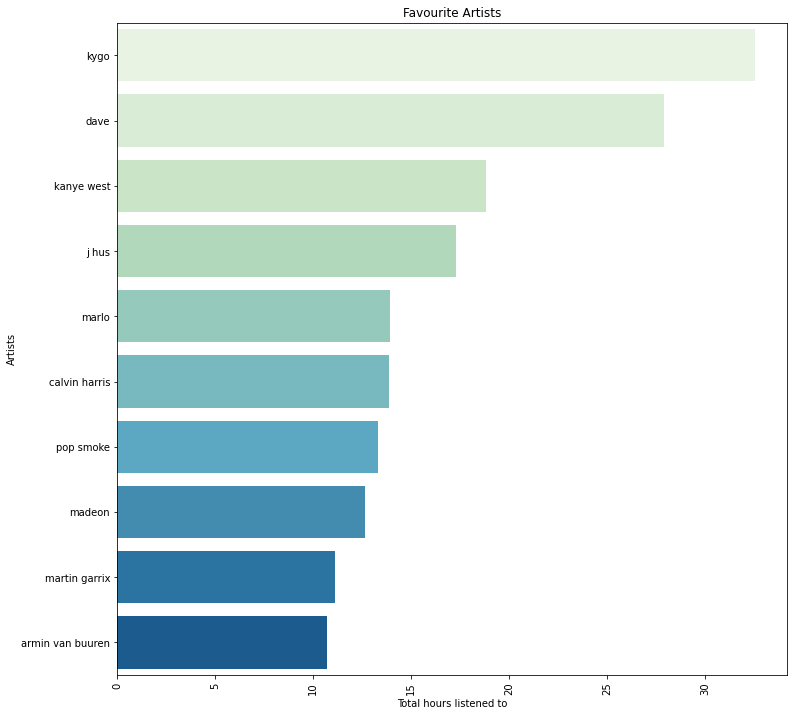

In [368]:
plt.figure(figsize=(12,12))
sns.barplot(y='artistName',x='Total_Hours_Played',data=df_music.head(10),palette='GnBu')
plt.xticks( rotation=90)
plt.ylabel('Artists')
plt.xlabel('Total hours listened to')
plt.title('Favourite Artists')
plt.show()

In [342]:
fav_song=df.loc[(df['msPlayed']<900000)]

In [343]:
fav_song=fav_song.groupby([ 'trackName'], as_index=False).sum().sort_values(by='msPlayed', ascending = False)

In [344]:
#drop all the white noise 

In [345]:
fav_song=fav_song[(~fav_song['trackName'].str.contains("noise"))& (~fav_song['trackName'].str.contains('cabin sound'))&(~fav_song['trackName'].str.contains('granular'))]

In [346]:
#convert ms to minutes and rename columns

In [347]:
fav_song.columns=['trackName','Total msPlayed']

In [348]:
fav_song['Total_Minutes_Played']=fav_song['Total msPlayed']/60000

In [349]:
fav_song.drop(['Total msPlayed'],axis=1,inplace=True)

In [350]:
fav_song.head(10)

,trackName,Total_Minutes_Played
4459,"sex, love & water (mix cut) - mark sixma remix",258.842933
3217,mammoth,231.015217
5089,tequila,220.586950
5959,you're on (feat. kyan),220.183483
4409,screwface capital,219.778850
928,"carry on (from the original motion picture ""po...",217.029350
2069,good life,198.029833
755,both,192.723333
4786,stargazing,177.272317
5246,thiago silva,175.733617


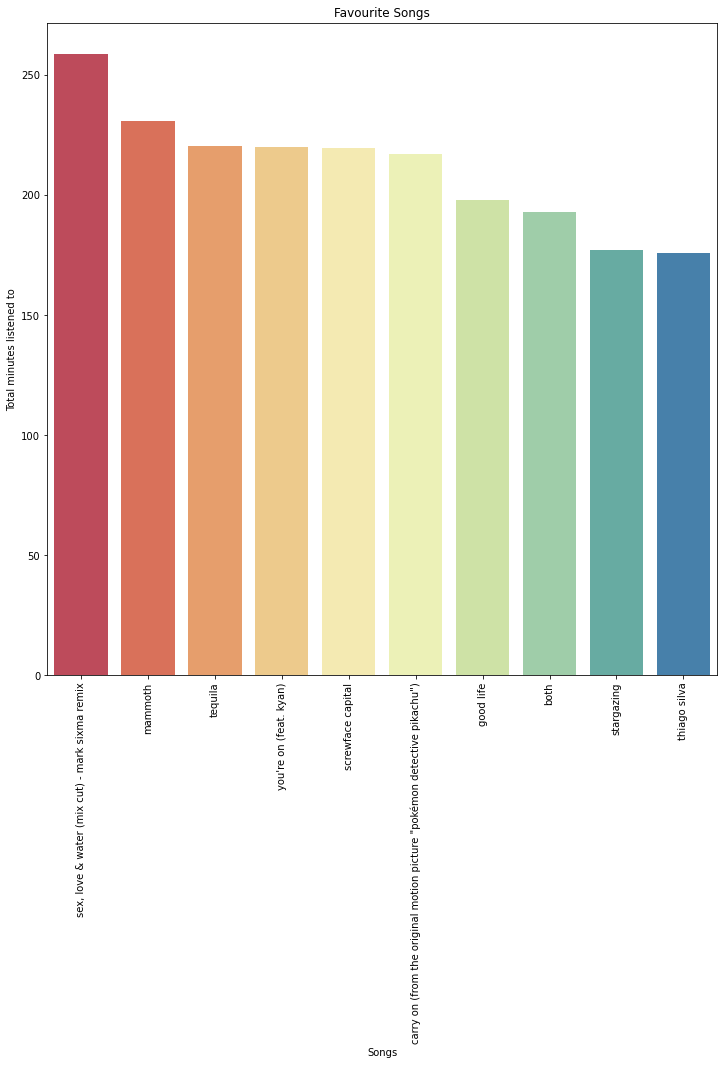

In [369]:
plt.figure(figsize=(12,12))
sns.barplot(x='trackName',y='Total_Minutes_Played',data=fav_song.head(10),palette='Spectral')
plt.xticks( rotation=90)
plt.xlabel('Songs')
plt.ylabel('Total minutes listened to')
plt.title('Favourite Songs')
plt.show()